<a href="https://colab.research.google.com/github/Nhattysha/Ethiopian-Language-Survey/blob/main/LH_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Machine Translation application using encoder/decoder model and attention mechanism



In [1]:
import tensorflow
from tensorflow.keras.layers import LSTM, Input, TimeDistributed, Dense, Embedding, Dropout, Concatenate, Activation, Dot
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
import numpy as np
import string
import json
import matplotlib.pyplot as plt

# Dataset preprocesing

Load ita/eng row data from .txt file.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path_to_data = "/content/drive/MyDrive/4.txt"
translation_file = open(path_to_data, "r", encoding='utf-8')
raw_data = translation_file.read()
translation_file.close()

**Data Parsing :** create a pair list where each element contains two strings; the sentence in Xamtanga and the corresponding sentence translated into English.

In [4]:
raw_data = raw_data.split('\n')
xamtanga_pairs = [sentence.split('\t') for sentence in raw_data]
xamtanga_pairs = xamtanga_pairs[:5010]

print("Input/Output example")
print("Xamtanga sentence : %s" % xamtanga_pairs[100][1])
print("English sentence : %s" % xamtanga_pairs[100][0])
print()
print("Xamtanga sentence : %s" % xamtanga_pairs[200][1])
print("English sentence : %s" % xamtanga_pairs[200][0])
print()
print("Xamtanga sentence : %s" % xamtanga_pairs[300][1])
print("English sentence : %s" % xamtanga_pairs[300][0])
print()


Input/Output example
Xamtanga sentence : ማቲወስት ወንጌል
English sentence : MATTHEW

Xamtanga sentence : ያን ጚ ጊንኩን
English sentence : I'm as old as he is.

Xamtanga sentence : ክትረስ አሰበጉዊንኑ
English sentence : I dreamed about you.



Lowercase and remove punctuation in sentences

In [5]:
# Lowercase and remove punctuation in sentences
def clean_sentence(sentence):
    # Add a space ' ' befor the ? word
    sentence = sentence.replace('?', ' ?')
    # Lower case the sentence
    lower_case_sent = sentence.lower()
    # Strip punctuation
    string_punctuation = string.punctuation  # !"#$%&'()*+, -./:;<=>?@[\]^_`{|}~
    string_punctuation = string_punctuation.replace('?','')
    # Clean the sentence
    clean_sentence = lower_case_sent.translate(str.maketrans('', '', string_punctuation))
    return clean_sentence

Split xamtanga and english sentences in two list and remove punctuation from it.

In [7]:
import string



In [8]:
xamtanga_sentences = [clean_sentence(pair[1]) for pair in pairs]
english_sent = [clean_sentence(pair[0]) for pair in pairs]


NameError: name 'pairs' is not defined

In [ ]:
X_train_decoder   = []
Y_train_decoder   = []
english_sentences = []

# Add <start> token at start of every input decoder sentence and
# add <end> token at end of every target decoder sentence.
for sentence in english_sent:
    X_train_decoder.append("<start> " + sentence)
    Y_train_decoder.append(sentence + " <end>")
    english_sentences.append("<start> " + sentence + " <end>")

NameError: name 'english_sent' is not defined

Tokenize dataset

In [ ]:
def tokenize(sentences):
    # Create tokenizer
    text_tokenizer = Tokenizer(filters='')
    # Fit texts
    text_tokenizer.fit_on_texts(sentences)
    return text_tokenizer.texts_to_sequences(sentences), text_tokenizer

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer


In [ ]:
# Tokenize encoder input
xam_text_tokenized, xam_text_tokenizer = tokenize(xamtanga_sentences)
# Tokenize decoder input
_, eng_text_tokenizer = tokenize(english_sentences)
eng_in_text_tokenized = eng_text_tokenizer.texts_to_sequences(X_train_decoder)
eng_out_text_tokenized = eng_text_tokenizer.texts_to_sequences(Y_train_decoder)


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
# Let's add 0 padding to the sentences, to make sure they are all the same length.
# That is, we must be sure that all Xamtanga sentences have the same length as the
# longest Xamtanga sentence and that all English sentences have the same length
# as the longest English sentence
X_train_encoder = pad_sequences(xam_text_tokenized, padding="post")
X_train_decoder = pad_sequences(eng_in_text_tokenized, padding="post")
Y_train_decoder = pad_sequences(eng_out_text_tokenized, padding="post")

# Let's check the length of the vocabulary
# Let's add one unit to size for 0 padding
Xamtanga_vocab_size = len(xam_text_tokenizer.word_index) + 1
english_vocab_size = len(eng_text_tokenizer.word_index) + 1


# get the lenght of max italian/english sentence
max_Xamtanga_len = X_train_encoder[0].shape[0]
max_english_len = X_train_decoder[0].shape[0]


In [ ]:
print("Xamtanga vocabulary has %d words" % Xamtanga_vocab_size)
print("English vocabulary has %d words" % english_vocab_size)
print("\n")
print("The max length of an Xamtanga sentence is %d words" % max_Xamtanga_len)
print("The max length of an English sentence is %d words" % max_english_len)
print("\n")
print(xamtanga_sentences[160] + "\n-> " + str(X_train_encoder[160])+"\n")
print(english_sent[160]+ "\n-> Input  -> "+ str(X_train_decoder[160])+"\n-> Target -> "+str(Y_train_decoder[160]))

Xamtanga vocabulary has 11065 words
English vocabulary has 3642 words


The max length of an Xamtanga sentence is 35 words
The max length of an English sentence is 69 words


ኢንጅነር ቅጣው እጅጉ አው ጛይ ?
-> [3737 3738 3739  983   36    5    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0]

who are the engineer kitaw ejigu ?
-> Input  -> [   2   21   34    1 2203 2204 2205   40    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0]
-> Target -> [  21   34    1 2203 2204 2205   40    3    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0 

Split dataset in training/validation/testing set

In [ ]:
X_train_encoder_ = X_train_encoder[:2000]
X_train_decoder_ = X_train_decoder[:2000]
Y_train_decoder_ = Y_train_decoder[:2000]

X_valid_encoder = X_train_encoder[2001:2405]
X_valid_decoder = X_train_decoder[2001:2405]
Y_valid_decoder = Y_train_decoder[2001:2405]

X_test_encoder = X_train_encoder[2406:]
X_test_decoder = X_train_decoder[2406:]
Y_test_decoder = Y_train_decoder[2406:]

X_train_encoder = X_train_encoder_
X_train_decoder = X_train_decoder_
Y_train_decoder = Y_train_decoder_

print("Train set has %d sentences" %len(X_train_encoder))
print("Validation set has %d sentences" %len(X_valid_encoder))
print("Test set has %d sentences" %len(X_test_encoder))

Train set has 2000 sentences
Validation set has 404 sentences
Test set has 404 sentences


In [ ]:
import tensorflow
from tensorflow.keras.layers import Input, Embedding, LSTM, Dropout, Dense, TimeDistributed
from tensorflow.keras.models import Model

# Encoder
encoder_input = Input(shape=[None], dtype=tensorflow.int32)
encoder_embedding = Embedding(input_dim=xamtanga_vocab_size+1,
                              output_dim=256,
                              mask_zero=True)(encoder_input)

_, enc_state_h, enc_state_c = LSTM(256, return_state=True, return_sequences=False)(encoder_embedding)
# Save the state of the last step of the encoder which will be the initial state of the decoder.
encoder_state = [enc_state_h, enc_state_c]

# Decoder
decoder_input = Input(shape=[None], dtype=tensorflow.int32)
decoder_embedding = Embedding(input_dim=english_vocab_size+1,
                              output_dim=256,
                              mask_zero=True)(decoder_input)
decoder_lstm_output, dec_state_h, dec_state_c = LSTM(256, return_sequences=True, return_state=True)(decoder_embedding, initial_state=encoder_state)

decoder_lstm_output_dropout = Dropout(0.5)(decoder_lstm_output)
decoder_output = TimeDistributed(Dense(english_vocab_size, activation="softmax"))(decoder_lstm_output_dropout)

# Define model
model = Model(inputs=[encoder_input, decoder_input], outputs=[decoder_output])
# Compile model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
model.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_31 (InputLayer)       [(None, None)]               0         []                            
                                                                                                  
 input_32 (InputLayer)       [(None, None)]               0         []                            
                                                                                                  
 embedding_18 (Embedding)    (None, None, 256)            2832896   ['input_31[0][0]']            
                                                                                                  
 embedding_19 (Embedding)    (None, None, 256)            932608    ['input_32[0][0]']            
                                                                                           

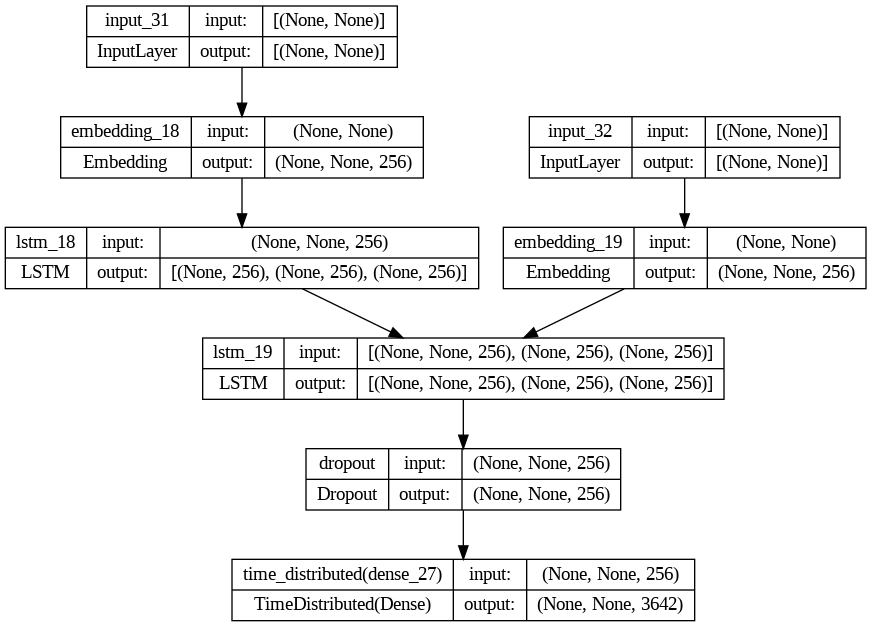

In [ ]:
tensorflow.keras.utils.plot_model(model, to_file='model_without_attention.png', show_shapes=True)

IndentationError: expected an indented block after 'try' statement on line 3 (<ipython-input-145-88daed0c660b>, line 5)

Xamtanga sentence: ውጥየነው
Preprocessed Xamtanga sentence (tokenized and padded): [3632    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0]

English sentence: run
Preprocessed English sentence (tokenized and padded): [845   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Target English sentence (tokenized and padded): [845   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


AttributeError: 'ellipsis' object has no attribute 'shape'

TypeError: 'ellipsis' object is not subscriptable

AttributeError: 'ellipsis' object has no attribute 'shape'

In [ ]:
model_name = "without_attention.h5"
mcp_save = ModelCheckpoint(filepath=model_name,
                           save_best_only=True,
                           monitor='val_loss',
                           mode='min',
                           verbose=1)

history = model.fit([X_train_encoder, X_train_decoder], Y_train_decoder,
                    epochs=25,
                    validation_data=([X_valid_encoder, X_valid_decoder], Y_valid_decoder),
                    verbose=2,
                    batch_size=128,
                    callbacks=mcp_save)

model.save("final_epoch_"+model_name)

history_dict = history.history
# Save it under the form of a json file
json.dump(history_dict, open('history.json', 'w'))


Epoch 1/25


ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {"<class 'ellipsis'>"}), <class 'ellipsis'>

# Define and train model without attention mechanism

In [ ]:
# Define encoder inputs
encoder_input = Input(shape=(None,))
encoder_embedding = Embedding(input_dim=Xamtanga_vocab_size + 1, output_dim=256, mask_zero=True)(encoder_input)
_, enc_state_h, enc_state_c = LSTM(256, return_state=True)(encoder_embedding)
encoder_state = [enc_state_h, enc_state_c]

# Define decoder inputs
decoder_input = Input(shape=(None,))
decoder_embedding = Embedding(input_dim=english_vocab_size + 1, output_dim=256, mask_zero=True)(decoder_input)
decoder_lstm_output, _, _ = LSTM(256, return_sequences=True, return_state=True)(decoder_embedding, initial_state=encoder_state)
decoder_output = Dense(english_vocab_size, activation='softmax')(decoder_lstm_output)

# Define the model
model = Model(inputs=[encoder_input, decoder_input], outputs=decoder_output)

# Compile the model
model.compile





<bound method Model.compile of <keras.src.engine.functional.Functional object at 0x7feb1ddafd00>>

Define and train model without attention mechanism

In [ ]:
# Print model summary
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 input_8 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 embedding_4 (Embedding)     (None, None, 256)            2832896   ['input_7[0][0]']             
                                                                                                  
 embedding_5 (Embedding)     (None, None, 256)            932608    ['input_8[0][0]']             
                                                                                            

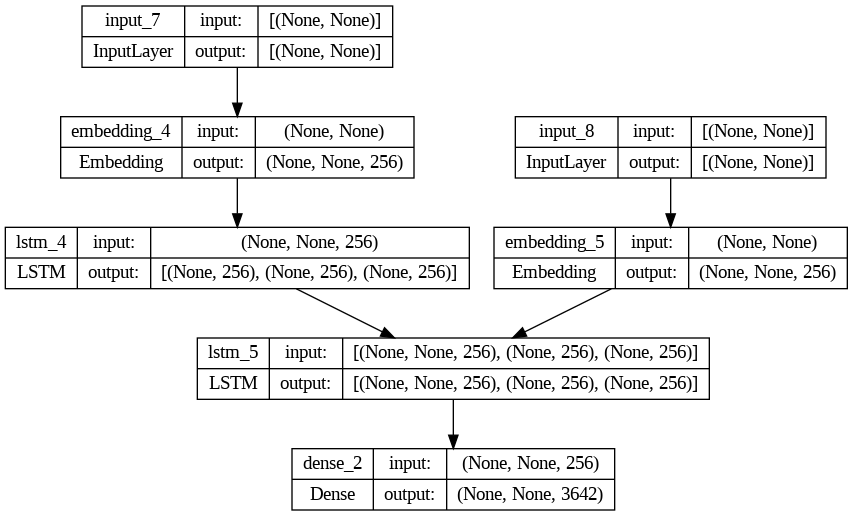

In [ ]:
tensorflow.keras.utils.plot_model(model, to_file='model_without_attention.png', show_shapes=True)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(100,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Define the encoder input layer
encoder_input = Input(shape=[100])

# Define the decoder input layer
decoder_input = Input(shape=[100])

# Define the encoder layers
encoder_output = Dense(64, activation='relu')(encoder_input)
encoder_output = Dense(64, activation='relu')(encoder_output)

# Define the decoder layers
decoder_output = Dense(64, activation='relu')(decoder_input)
decoder_output = Dense(64, activation='relu')(decoder_output)

# Merge encoder and decoder outputs
merged_output = tensorflow.keras.layers.concatenate([encoder_output, decoder_output])

# Output layer
output = Dense(10, activation='softmax')(merged_output)

# Define the model
model = Model(inputs=[encoder_input, decoder_input], outputs=output)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_name = "without_attention.h5"
mcp_save = ModelCheckpoint(filepath=model_name,
                           save_best_only=True,
                           monitor='val_loss',
                           mode='min',
                           verbose=1)

history = model.fit([X_train_encoder, X_train_decoder], Y_train_decoder,
                    epochs=10,
                    validation_data=([X_valid_encoder, X_valid_decoder], Y_valid_decoder),
                    verbose=2,
                    batch_size=128,
                    callbacks=[mcp_save])

model.save("final_epoch_" + model_name)

history_dict = history.history
# Save it under the form of a json file
json.dump(history_dict, open('history with out attention.json', 'w'))

Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_5" is incompatible with the layer: expected shape=(None, 100), found shape=(None, 35)


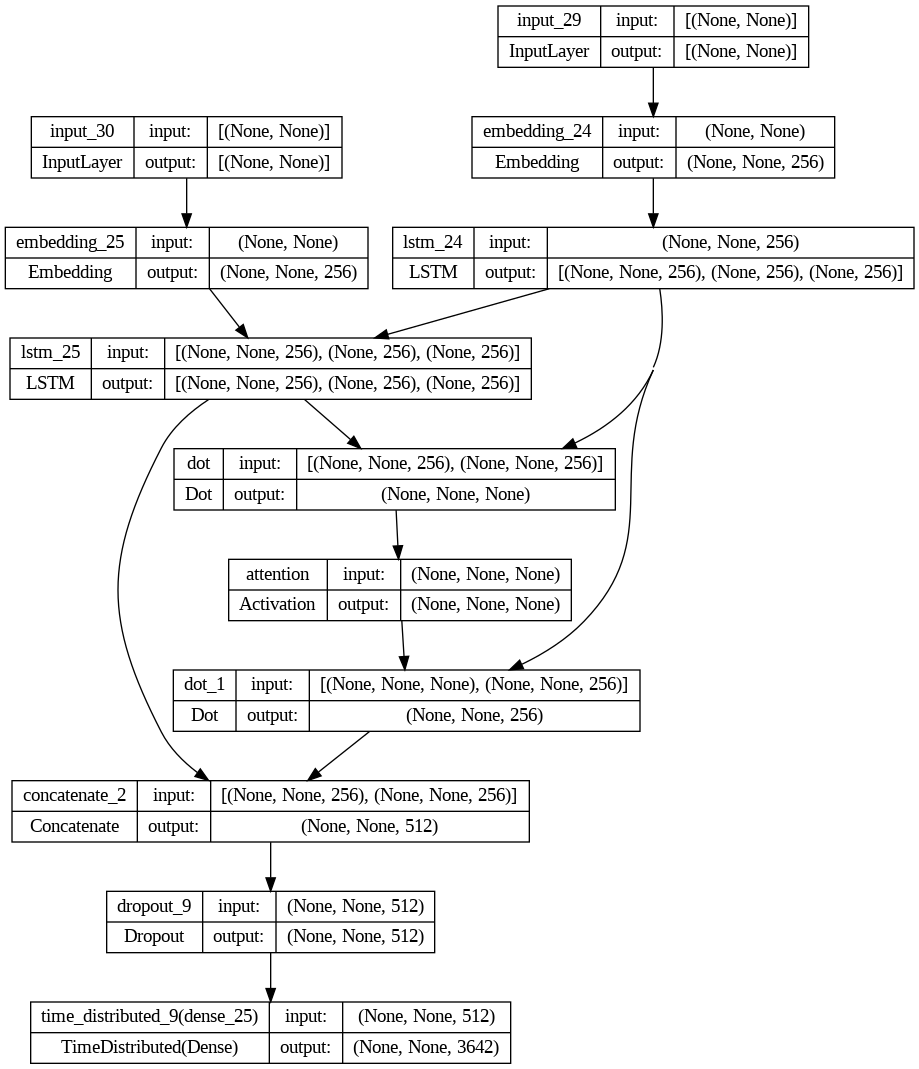

In [ ]:
tensorflow.keras.utils.plot_model(model, to_file='model_without_attention.png', show_shapes=True)

The best result was :

`[epoch 25] : loss: 3.9346 - accuracy: 0.2514 - val_loss: 4.9729 - val_accuracy: 0.1794`





In [ ]:
def plot_training_accuracy(history, savePlot=False, title = "fig"):
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train loss', 'validation loss'], loc='upper left')
    if savePlot:
        plt.savefig(title+'_loss.png')
    plt.show()

    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    if savePlot:
        plt.savefig(title+'_acc.png')
    plt.show()

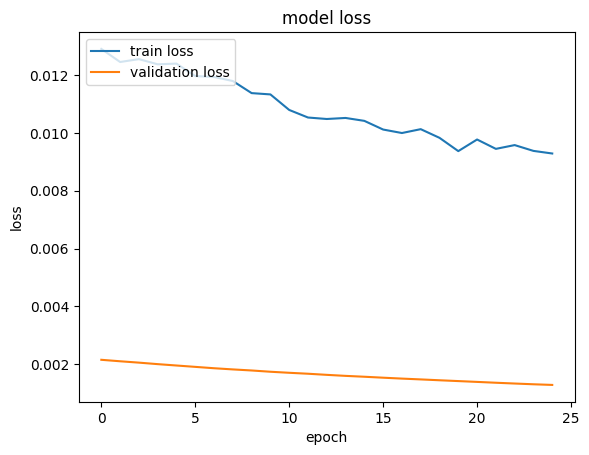

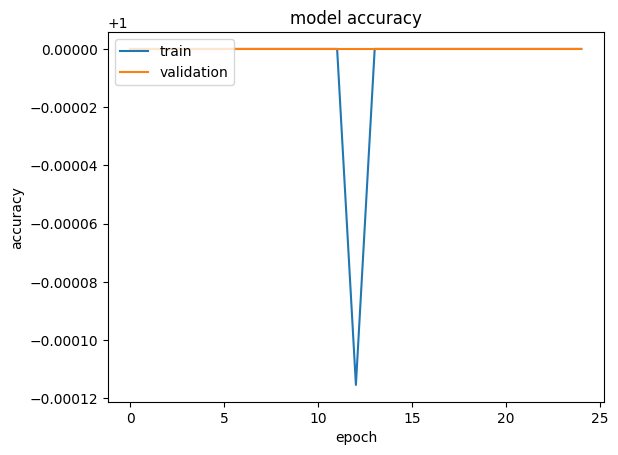

In [ ]:
path = "/content/drive/MyDrive/history.json"
history_dict_without_att = json.load(open(path, 'r'))
plot_training_accuracy(history = history_dict_without_att, savePlot=False, title = "prova")

# Inference phase on encoder/decoder model with teacher forcing without attention mechanism

Build (and restore loaded) model that NOT use attention mechanism for inference time

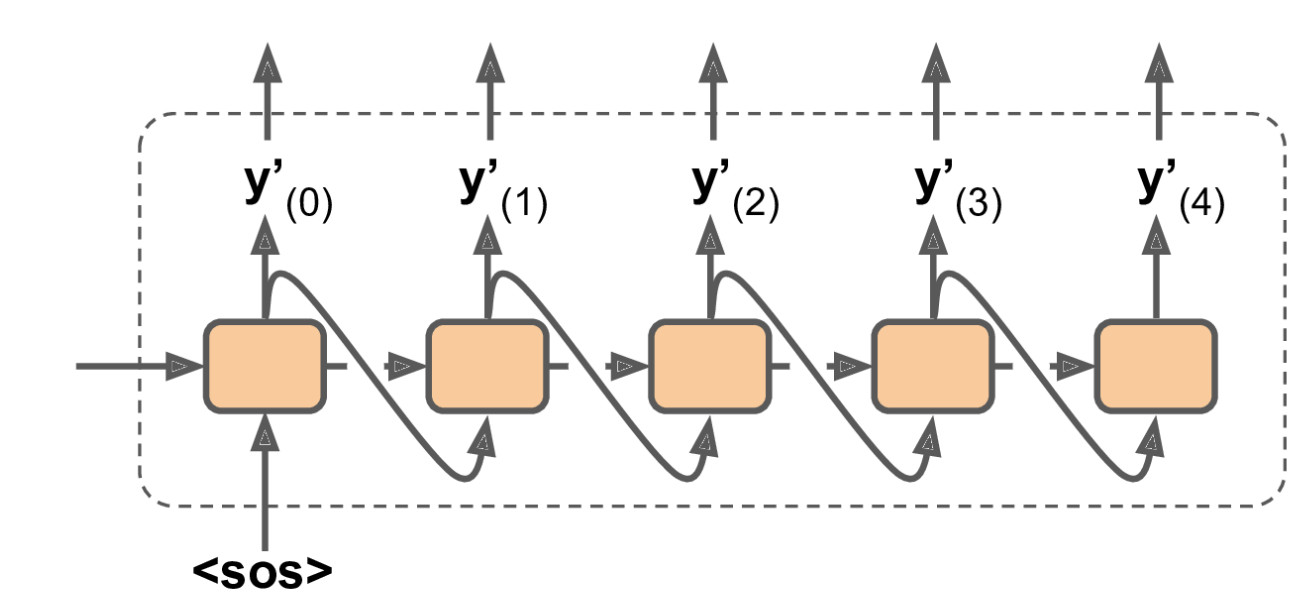

In [ ]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, TimeDistributed
from tensorflow.keras.models import Model
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the vocabulary sizes
italian_vocab_size = 11065   # Placeholder value, replace with actual value
english_vocab_size = 3642    # Placeholder value, replace with actual value

# Define encoder inputs
input_1 = Input(shape=(None,))
embedding = Embedding(input_dim=italian_vocab_size + 1, output_dim=256, mask_zero=True)(input_1)
_, lstm, lstm_state_c = LSTM(256, return_sequences=True, return_state=True)(embedding)

# Define decoder inputs
input_2 = Input(shape=(None,))
embedding_1 = Embedding(input_dim=english_vocab_size + 1, output_dim=256, mask_zero=True)(input_2)
lstm_1 = LSTM(256, return_sequences=True)(embedding_1, initial_state=[lstm, lstm_state_c])
dropout = Dropout(0.5)(lstm_1)
time_distributed = TimeDistributed(Dense(english_vocab_size, activation='softmax'))(dropout)

# Define the model
model = Model(inputs=[input_1, input_2], outputs=time_distributed)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Save the model to Google Drive
model_name = "/content/drive/MyDrive/NMT/model_without_attention.h5"
model.save(model_name)

print("Model saved to:", model_name)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "model_31"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_27 (InputLayer)       [(None, None)]               0         []                            
                                                                                                  
 input_28 (InputLayer)       [(None, None)]               0         []                            
                                                                                                  
 embedding_22 (Embedding)    (None, None, 256)            2832896   ['input_27[0][0]']            
                                                                                                  
 embedding_23 (Embedding)    (None, None, 256)            932

In [ ]:
model_name = "/content/drive/MyDrive/NMT/model_without_attention.h5"
model = load_model(model_name)
for layer in model.layers:
    print(layer.name)


input_27
input_28
embedding_22
embedding_23
lstm_22
lstm_23
dropout_8
time_distributed_8


In [ ]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import Model

# Define encoder model
encoder_input = model.input[0]
_, state_h, state_c = model.layers[4].output
encoder_states = [state_h, state_c]
encoder_model = Model(encoder_input, encoder_states)

# Define decoder model
decoder_input = model.input[1]
decoder_state_h_input = Input(shape=(256,), name="input_3")
decoder_state_c_input = Input(shape=(256,), name="input_4")
decoder_states_inputs = [decoder_state_h_input, decoder_state_c_input]

embedding_layer = model.layers[3]
embedded_decoder = embedding_layer(decoder_input)

decoder_lstm = model.layers[5]
decoder_outputs, state_h, state_c = decoder_lstm(embedded_decoder, initial_state=decoder_states_inputs)

decoder_states = [state_h, state_c]

dropout_layer = model.layers[6]
dropout_out = dropout_layer(decoder_outputs)

decoder_dense = model.layers[7]
decoder_outputs = decoder_dense(dropout_out)

decoder_model = Model(
    inputs=[decoder_input] + decoder_states_inputs,
    outputs=[decoder_outputs] + decoder_states
)


TypeError: Cannot iterate over a Tensor with unknown first dimension.

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Dense, Masking
from tensorflow.keras.models import Model
import tensorflow as tf

# Define input shapes
input_1 = Input(shape=(None, input_dim))  # Define input shape with known input_dim
input_2 = Input(shape=(None, output_dim)) # Define input shape with known output_dim

# Define layers
lstm_1 = LSTM(256, return_sequences=True)(input_1)
lstm_2 = LSTM(256, return_sequences=True)(input_2)

# Handle variable-length sequences with masking
masked_lstm_1 = Masking()(lstm_1)
masked_lstm_2 = Masking()(lstm_2)

# Define the rest of your model layers and architecture here

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
model.fit([input_1_data, input_2_data], output_data, ...)


NameError: name 'input_dim' is not defined

In [ ]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, TimeDistributed
from tensorflow.keras.models import Model
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the vocabulary sizes
italian_vocab_size = 11065   # Placeholder value, replace with actual value
english_vocab_size = 3642    # Placeholder value, replace with actual value

# Define encoder inputs
input_1 = Input(shape=(None,))
embedding = Embedding(input_dim=italian_vocab_size + 1, output_dim=256, mask_zero=True)(input_1)
_, lstm, lstm_state_c = LSTM(256, return_sequences=True, return_state=True)(embedding)

# Define decoder inputs
input_2 = Input(shape=(None,))
embedding_1 = Embedding(input_dim=english_vocab_size + 1, output_dim=256, mask_zero=True)(input_2)
lstm_1 = LSTM(256, return_sequences=True)(embedding_1, initial_state=[lstm, lstm_state_c])
dropout = Dropout(0.5)(lstm_1)
time_distributed = TimeDistributed(Dense(english_vocab_size, activation='softmax'))(dropout)

# Define the model
model = Model(inputs=[input_1, input_2], outputs=time_distributed)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Save the model to Google Drive
model_name = "/content/drive/MyDrive/NMT/model_without_attention.h5"
model.save(model_name)

print("Model saved to:", model_name)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "model_28"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_25 (InputLayer)       [(None, None)]               0         []                            
                                                                                                  
 input_26 (InputLayer)       [(None, None)]               0         []                            
                                                                                                  
 embedding_20 (Embedding)    (None, None, 256)            2832896   ['input_25[0][0]']            
                                                                                                  
 embedding_21 (Embedding)    (None, None, 256)            932

In [ ]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, TimeDistributed
from tensorflow.keras.models import Model
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the vocabulary sizes
italian_vocab_size = 11065   # Placeholder value, replace with actual value
english_vocab_size = 3642    # Placeholder value, replace with actual value

# Define encoder inputs
input_1 = Input(shape=(None,))
embedding = Embedding(input_dim=italian_vocab_size + 1, output_dim=256, mask_zero=True)(input_1)
_, lstm, lstm_state_c = LSTM(256, return_sequences=True, return_state=True)(embedding)

# Define decoder inputs
input_2 = Input(shape=(None,))
embedding_1 = Embedding(input_dim=english_vocab_size + 1, output_dim=256, mask_zero=True)(input_2)
lstm_1 = LSTM(256, return_sequences=True)(embedding_1, initial_state=[lstm, lstm_state_c])
dropout = Dropout(0.5)(lstm_1)
time_distributed = TimeDistributed(Dense(english_vocab_size, activation='softmax'))(dropout)

# Define the model
model = Model(inputs=[input_1, input_2], outputs=time_distributed)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Save the model to Google Drive
model_name = "/content/drive/MyDrive/NMT/model_without_attention.h5"
model.save(model_name)

print("Model saved to:", model_name)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "model_23"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_23 (InputLayer)       [(None, None)]               0         []                            
                                                                                                  
 input_24 (InputLayer)       [(None, None)]               0         []                            
                                                                                                  
 embedding_18 (Embedding)    (None, None, 256)            2832896   ['input_23[0][0]']            
                                                                                                  
 embedding_19 (Embedding)    (None, None, 256)            932

In [ ]:
model_name = "/content/drive/MyDrive/NMT/model_without_attention.h5"
model = load_model(model_name)
for layer in model.layers:
    print(layer.name)

input_25
input_26
embedding_20
embedding_21
lstm_20
lstm_21
dropout_7
time_distributed_7


In [ ]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import Model

# Define encoder model
encoder_input = model.input[0]
_, state_h, state_c = model.layers[4].output
encoder_states = [state_h, state_c]
encoder_model = Model(encoder_input, encoder_states)

# Define decoder model
decoder_input = model.input[1]
decoder_state_h_input = Input(shape=(256,), name="input_3")
decoder_state_c_input = Input(shape=(256,), name="input_4")
decoder_states_inputs = [decoder_state_h_input, decoder_state_c_input]

embedding_layer = model.layers[3]
embedded_decoder = embedding_layer(decoder_input)

decoder_lstm = model.layers[5]
decoder_outputs, state_h, state_c = decoder_lstm(embedded_decoder, initial_state=decoder_states_inputs)

decoder_states = [state_h, state_c]

dropout_layer = model.layers[6]
dropout_out = dropout_layer(decoder_outputs)

decoder_dense = model.layers[7]
decoder_outputs = decoder_dense(dropout_out)

decoder_model = Model(
    inputs=[decoder_input] + decoder_states_inputs,
    outputs=[decoder_outputs] + decoder_states
)


TypeError: Cannot iterate over a Tensor with unknown first dimension.

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout

# Define encoder model
encoder_input = model.input[0]
_, state_h, state_c = model.layers[4].output
encoder_states = [state_h, state_c]
encoder_model = Model(encoder_input, encoder_states)

# Define decoder model
decoder_input = model.input[1]
decoder_state_h_input = Input(shape=(256,), name="input_3")
decoder_state_c_input = Input(shape=(256,), name="input_4")
decoder_states_inputs = [decoder_state_h_input, decoder_state_c_input]

embedding_layer = model.layers[3]
embedded_decoder = embedding_layer(decoder_input)

decoder_lstm = model.layers[5]
decoder_outputs, state_h, state_c = decoder_lstm(embedded_decoder, initial_state=decoder_states_inputs)

decoder_states = [state_h, state_c]

dropout_layer = model.layers[6]
dropout_out = dropout_layer(decoder_outputs)

decoder_dense = model.layers[7]
decoder_outputs = decoder_dense(dropout_out)

decoder_model = Model(
    inputs=[decoder_input] + decoder_states_inputs,
    outputs=[decoder_outputs] + decoder_states
)


TypeError: Cannot iterate over a Tensor with unknown first dimension.

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense

# Define encoder model
encoder_input = model.input[0]
_, state_h, state_c = model.layers[4].output
encoder_states = [state_h, state_c]
encoder_model = Model(encoder_input, encoder_states)

# Define decoder model
decoder_input = model.input[1]
embedded_decoder = model.layers[3].output  # Use the output of the Embedding layer
decoder_state_h = Input(shape=(256,), name="input_3")
decoder_state_c = Input(shape=(256,), name="input_4")
decoder_state_inputs = [decoder_state_h, decoder_state_c]
decoder_lstm = model.layers[5]
decoder_outputs, state_h, state_c = decoder_lstm(embedded_decoder, initial_state=decoder_state_inputs)
decoder_states = [state_h, state_c]

# Decoder outputs
dropout_out = model.layers[6]
dropout_out = dropout_out(decoder_outputs)
decoder_dense = model.layers[7]
decoder_outputs = decoder_dense(dropout_out)

decoder_model = Model(
    inputs=[decoder_input] + decoder_state_inputs,
    outputs=[decoder_outputs] + decoder_states
)

TypeError: Cannot iterate over a Tensor with unknown first dimension.

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense

# Define encoder model
encoder_input = model.input[0]
_, state_h, state_c = model.layers[4].output
encoder_states = [state_h, state_c]
encoder_model = Model(encoder_input, encoder_states)

# Define decoder model
decoder_input = model.input[1]
embeded_decoder = model.layers[3]
decoder_state_h = Input(shape=(256,), name="input_3")
decoder_state_c = Input(shape=(256,), name="input_4")
decoder_state_inputs = [decoder_state_h, decoder_state_c]
decoder_lstm = model.layers[5]
decoder_outputs, state_h, state_c = decoder_lstm(embeded_decoder, initial_state=decoder_state_inputs)
decoder_states = [state_h, state_c]

# Decoder outputs
dropout_out = model.layers[6]
dropout_out = dropout_out(decoder_outputs)
decoder_dense = model.layers[7]
decoder_outputs = decoder_dense(dropout_out)

decoder_model = Model(
    inputs=[decoder_input] + decoder_state_inputs,
    outputs=[decoder_outputs] + decoder_states
)

AttributeError: Exception encountered when calling layer "lstm_19" (type LSTM).

'Embedding' object has no attribute 'shape'

Call arguments received by layer "lstm_19" (type LSTM):
  • inputs=['<keras.src.layers.core.embedding.Embedding object at 0x7ebda871dff0>', 'tf.Tensor(shape=(None, 256), dtype=float32)', 'tf.Tensor(shape=(None, 256), dtype=float32)']
  • mask=None
  • training=None
  • initial_state=None

In [ ]:
# Encoder
encoder_input = model.input[0]
_, state_h, state_c = model.layers[4].output
encoder_states = [state_h, state_c]
encoder_model = Model(encoder_input, # input encoder model
                      encoder_states)# output encoder model

# Decoder
decoder_input = model.input[1]
embeded_decoder = model.layers[3]
embeded_decoder = embeded_decoder(decoder_input)
decoder_state_h = Input(shape=(256), name="input_3")
decoder_state_c = Input(shape=(256), name="input_4")
decoder_state_inputs = [decoder_state_h,decoder_state_c]
decoder_lstm = model.layers[5]
decoder_outputs, state_h, state_c = decoder_lstm(embeded_decoder, initial_state=decoder_state_inputs)
decoder_states = [state_h,state_c]

# decoder outputs
dropout_out = model.layers[6]
dropout_out = dropout_out(decoder_outputs)
decoder_dense = model.layers[7]
decoder_outputs = decoder_dense(dropout_out)

decoder_model = Model([decoder_input]+decoder_state_inputs, # input decoder model
                          [decoder_outputs]+decoder_states) # output decoder model


TypeError: Cannot iterate over a Tensor with unknown first dimension.

In [ ]:

# Define encoder model
encoder_input = model.input[0]
_, state_h, state_c = model.layers[4].output
encoder_states = [state_h, state_c]
encoder_model = Model(encoder_input, encoder_states)

# Define decoder model
decoder_input = model.input[1]
decoder_state_h_input = Input(shape=(256,), name="input_3")
decoder_state_c_input = Input(shape=(256,), name="input_4")
decoder_states_inputs = [decoder_state_h_input, decoder_state_c_input]

embedding_layer = model.layers[2]  # Index of the embedding layer might be different in your model
embedded_decoder = embedding_layer(decoder_input)

decoder_lstm = model.layers[4]  # Index of the LSTM layer might be different in your model
decoder_outputs, state_h, state_c = decoder_lstm(embedded_decoder, initial_state=decoder_states_inputs)

decoder_states = [state_h, state_c]

dropout_layer = model.layers[6]  # Index of the dropout layer might be different in your model
dropout_out = dropout_layer(decoder_outputs)

decoder_dense = model.layers[7]  # Index of the dense layer might be different in your model
decoder_outputs = decoder_dense(dropout_out)

decoder_model = Model(
    [decoder_input] + decoder_states_inputs,
    [decoder_outputs] + decoder_states
)

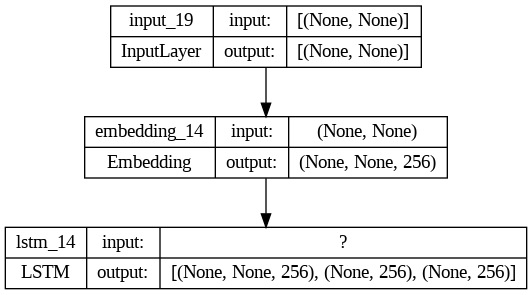

In [ ]:
tensorflow.keras.utils.plot_model(encoder_model, to_file='encoder_inference_no_attention.png', show_shapes=True)

In [ ]:
# Encoder
encoder_input = model.input[0]
_, state_h, state_c = model.layers[4].output
encoder_states = [state_h, state_c]
encoder_model = Model(encoder_input, # input encoder model
                      encoder_states)# output encoder model

# Decoder
decoder_input = model.input[1]
embeded_decoder = model.layers[3]
embeded_decoder = embeded_decoder(decoder_input)
decoder_state_h = Input(shape=(256), name="input_3")
decoder_state_c = Input(shape=(256), name="input_4")
decoder_state_inputs = [decoder_state_h,decoder_state_c]
decoder_lstm = model.layers[5]
decoder_outputs, state_h, state_c = decoder_lstm(embeded_decoder, initial_state=decoder_state_inputs)
decoder_states = [state_h,state_c]

# decoder outputs
dropout_out = model.layers[6]
dropout_out = dropout_out(decoder_outputs)
decoder_dense = model.layers[7]
decoder_outputs = decoder_dense(dropout_out)

decoder_model = Model([decoder_input]+decoder_state_inputs, # input decoder model
                          [decoder_outputs]+decoder_states) # output decoder model

TypeError: Cannot iterate over a Tensor with unknown first dimension.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from tensorflow.keras.models import load_model

# Load the saved model without attention mechanism
model_name = "/content/drive/MyDrive/NMT/model_without_attention.h5"
model = load_model(model_name)

# Print the names of layers in the loaded model
print("Layers in the loaded model:")
for layer in model.layers:
    print(layer.name)

# Remove attention layers from the loaded model
# Assuming your model's architecture:
# Input -> Encoder -> Decoder -> Output
# You need to remove the attention layers between Decoder and Output

# Get all layers up to the decoder output
new_output = model.layers[-2].output  # Assuming attention layer is the last layer
new_model = Model(inputs=model.input, outputs=new_output)

# Save the new model to Google Drive
new_model_name = "/content/drive/MyDrive/model_without_attention_inference.h5"
new_model.save(new_model_name)

print("New model without attention mechanism saved to:", new_model_name)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


OSError: No file or directory found at /content/drive/MyDrive/NMT/model_without_attention.h5

In [ ]:
# Encoder
encoder_input = model.input[0]
_, state_h, state_c = model.layers[4].output
encoder_states = [state_h, state_c]
encoder_model = Model(encoder_input, # input encoder model
                      encoder_states)# output encoder model

# Decoder
decoder_input = model.input[1]
embeded_decoder = model.layers[3]
embeded_decoder = embeded_decoder(decoder_input)
decoder_state_h = Input(shape=(256), name="input_3")
decoder_state_c = Input(shape=(256), name="input_4")
decoder_state_inputs = [decoder_state_h,decoder_state_c]
decoder_lstm = model.layers[5]
decoder_outputs, state_h, state_c = decoder_lstm(embeded_decoder, initial_state=decoder_state_inputs)
decoder_states = [state_h,state_c]

# decoder outputs
dropout_out = model.layers[6]
dropout_out = dropout_out(decoder_outputs)
decoder_dense = model.layers[7]
decoder_outputs = decoder_dense(dropout_out)

decoder_model = Model([decoder_input]+decoder_state_inputs, # input decoder model
                          [decoder_outputs]+decoder_states) # output decoder model

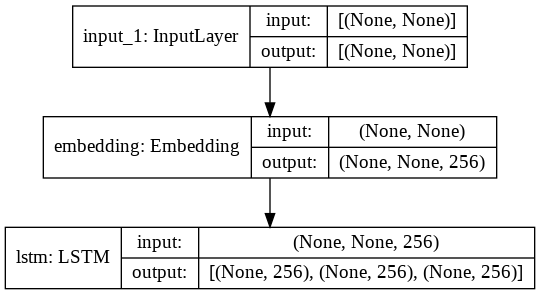

In [ ]:
tensorflow.keras.utils.plot_model(encoder_model, to_file='encoder_inference_no_attention.png', show_shapes=True)

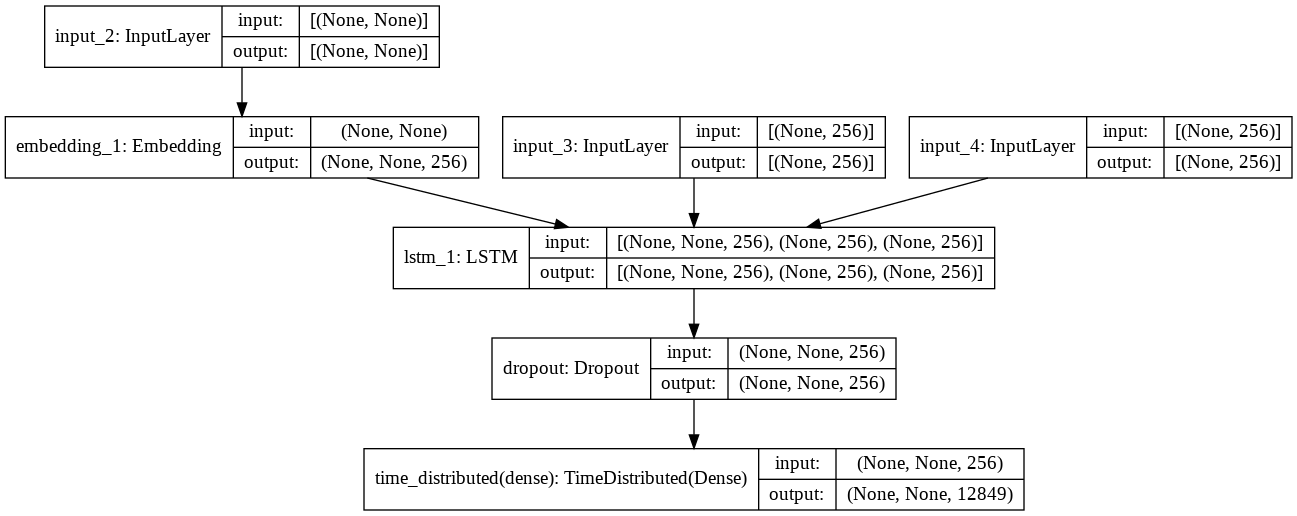

In [ ]:
tensorflow.keras.utils.plot_model(decoder_model, to_file='decoder_inference_no_attention.png', show_shapes=True)

Pre procesing on input sentence

In [ ]:
def pre_processing_sentece(sentence):
    sentence = clean_sentence(sentence)
    # Tokenize words
    sentence_tokenized = ita_text_tokenizer.texts_to_sequences([sentence])
    sentence_tokenized = pad_sequences(sentence_tokenized, max_italian_len, padding="post")
    return sentence_tokenized

Inference phase on encoder/decoder using teacher forcing but without attention mechanism

In [ ]:
def inference_without_attention(sentence):
    # Input the sequence to encoder_model and get the final timestep encoder_states(Hidden and cell state)
    state_h, state_c = encoder_model.predict(sentence)

    # Define target word
    target_word = np.zeros((1,1))
    # <start>:1 , <end>:2
    target_word[0,0] = 1

    stop_condition=False
    # Define output sentence string
    sent=''
    step_size=0

    index_to_words = {idx: word for word, idx in eng_text_tokenizer.word_index.items()}
    while not stop_condition:

        # We are giving a target_word which represents <start> and encoder_states to the decoder_model
        # for the first step and the output at the previous step for the next steps after the first
        output, state_h, state_c = decoder_model.predict([target_word, state_h, state_c])

        # As the target word length is 1. We will only have one time step
        #encoder_state_value = [state_h, state_c]
        # Find the word which the decoder predicted with max_probability
        output = np.argmax(output,-1)
        # The output is a integer sequence, to get back the word. We use our lookup table reverse_dict
        sent = sent+' '+str(index_to_words.get(int(output)))
        step_size+=1
        # If the max_length of the sequence is reached or the model predicted 2 (<end>) stop the model
        if step_size>max_english_len or output==2:
          stop_condition = True
        # Define next decoder input
        target_word=output.reshape(1,1)

    return sent

Inference on new sentence

In [ ]:
sentences = ["come stai?",
             "quanti anni hai?",
             "come ti chiami?",
             "è una bellissima giornata",
             "sei una ragazza pericolosa",
             "ho studiato duramente per superare l'esame",
             "mia madre dice sempre che sono bello"
             ]

for sentence in sentences:
    sentence_tokenized = pre_processing_sentece(sentence)
    translated_sentence = inference_without_attention(sentence_tokenized)
    print("Input  sentence :  %s" % sentence)
    print("Output sentence : %s" % translated_sentence)
    print()

Input  sentence :  come stai?
Output sentence :  how are you ? <end>

Input  sentence :  quanti anni hai?
Output sentence :  how old are you ? <end>

Input  sentence :  come ti chiami?
Output sentence :  whats your name ? <end>

Input  sentence :  è una bellissima giornata
Output sentence :  its a beautiful day <end>

Input  sentence :  sei una ragazza pericolosa
Output sentence :  youre a dangerous girl <end>

Input  sentence :  ho studiato duramente per superare l'esame
Output sentence :  i studied hard in order to pass the examination <end>

Input  sentence :  mia madre dice sempre che sono bello
Output sentence :  my mother always says hes handsome <end>



Inference from testing set

In [ ]:
sentences = []
sentences.append(["conosco una ragazza che parla molto bene il francese", "i know a girl who speaks french very well"])
sentences.append(["che cosa fareste se questo fosse il vostro ultimo giorno?", "what would you do if this was your last day ?"])
sentences.append(["le previsioni del tempo dicono che farà bello domani","the weather forecast says it will be fine tomorrow" ])
sentences.append(["dove posso comprare una chitarra da queste parti ?", "where can i buy a guitar around here?"])

for sentence in sentences:
    sentence_tokenized = pre_processing_sentece(sentence[0])
    translated_sentence = inference_without_attention(sentence_tokenized)
    print("Input  sentence :  %s" % sentence[0])
    print("Target sentence :  %s" % sentence[1])
    print("Output sentence : %s" % translated_sentence)
    print()


Input  sentence :  conosco una ragazza che parla molto bene il francese
Target sentence :  i know a girl who speaks french very well
Output sentence :  i know a girl who speaks french very well <end>

Input  sentence :  che cosa fareste se questo fosse il vostro ultimo giorno?
Target sentence :  what would you do if this was your last day ?
Output sentence :  what would you do if this was your last day ? <end>

Input  sentence :  le previsioni del tempo dicono che farà bello domani
Target sentence :  the weather forecast says it will be fine tomorrow
Output sentence :  the weather say you plan now think well <end>

Input  sentence :  dove posso comprare una chitarra da queste parti ?
Target sentence :  where can i buy a guitar around here?
Output sentence :  where can i buy a nearby area ? <end>



# Define and train model with attention mechanism

In [ ]:
# Encoder
encoder_input = Input(shape=[None], dtype=tensorflow.int32)
encoder_embedding = Embedding(input_dim=italian_vocab_size+1,
                              output_dim=256,
                              mask_zero=True)(encoder_input)

# If we train the model with attention mechanism, we must return the LSTM output for each step
encoder_lstm_output, enc_state_h, enc_state_c = LSTM(256, #dropout=0.3,
                                                     #recurrent_dropout=0.3,
                                                     return_state=True,
                                                     return_sequences=True)(encoder_embedding)
encoder_state = [enc_state_h, enc_state_c]  # save the state of the last step of the encoder which will be the initial state of the decoder.

# Decoder
decoder_input = Input(shape=[None], dtype=tensorflow.int32)
decoder_embedding = Embedding(input_dim=english_vocab_size+1,
                              output_dim=256,
                              mask_zero=True)(decoder_input)
decoder_lstm_output, dec_state_h, dec_state_c = LSTM(256, #dropout=0.3,
                                                     #recurrent_dropout=0.3,
                                                     return_sequences=True,
                                                     return_state=True)(decoder_embedding, initial_state=encoder_state)
# If we train the model with attention mechanism,
# we use the dot method to create the alignment vector definid in Luong Attention
##############
dot_prod = Dot(axes=(2, 2))([decoder_lstm_output, encoder_lstm_output])
attention = Activation('softmax', name='attention')
attention_vec = attention(dot_prod)
context = Dot(axes=(2, 1))([attention_vec, encoder_lstm_output])
conc_out = Concatenate()([context, decoder_lstm_output])
##############
decoder_lstm_output_dropout = Dropout(0.5)(conc_out)

decoder_output = TimeDistributed(Dense(english_vocab_size, activation="softmax"))(decoder_lstm_output_dropout)

model = Model(inputs=[encoder_input, decoder_input], outputs=[decoder_output])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])


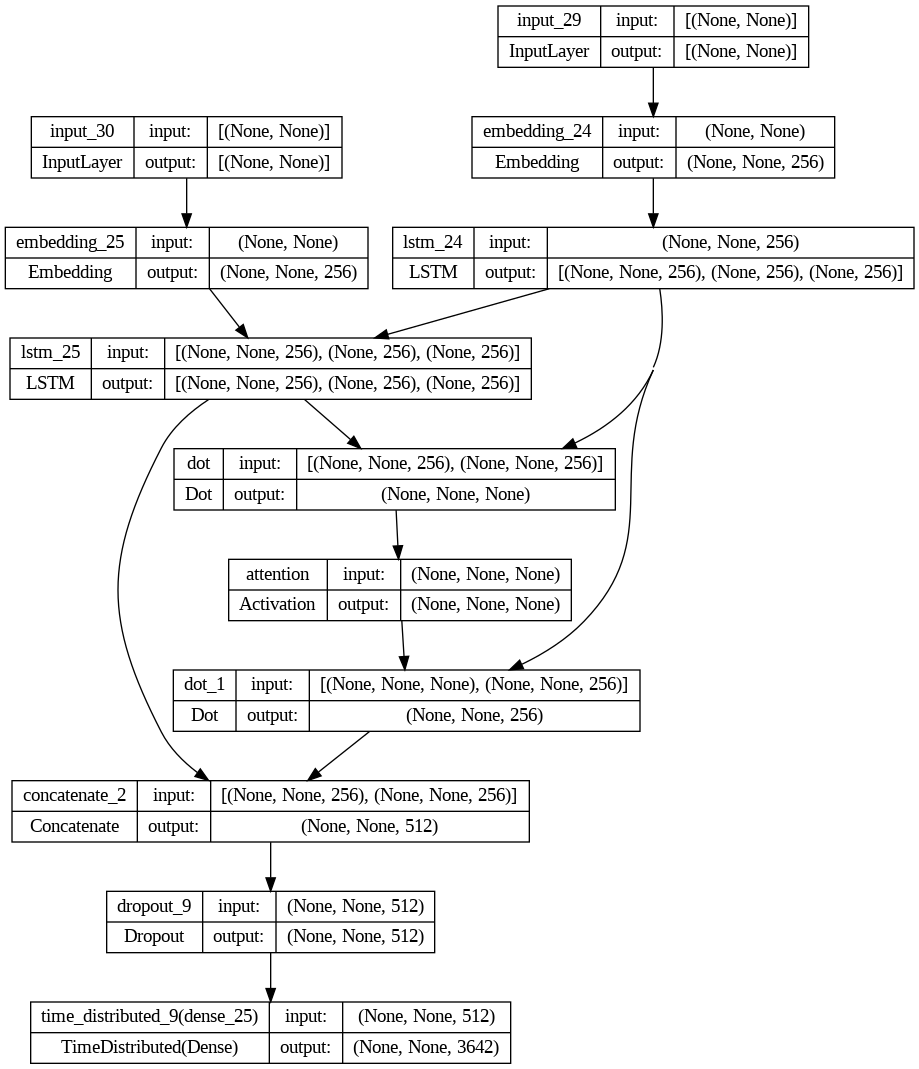

In [ ]:
tensorflow.keras.utils.plot_model(model, to_file='model_with_attention.png', show_shapes=True)

In [ ]:
model_name = "wit_attention.h5"
mcp_save = ModelCheckpoint(filepath=model_name,
                           save_best_only=True,
                           monitor='val_loss',
                           mode='min',
                           verbose=1)

history = model.fit([X_train_encoder, X_train_decoder], Y_train_decoder,
                    epochs=25,
                    validation_data=([X_valid_encoder, X_valid_decoder], Y_valid_decoder),
                    verbose=2,
                    batch_size=128,
                    callbacks=mcp_save)

model.save("final_epoch_"+model_name)

history_dict = history.history
# Save it under the form of a json file
json.dump(history_dict, open('history_with_att.json', 'w'))

Epoch 1/25

Epoch 1: val_loss improved from inf to 5.14840, saving model to wit_attention.h5
16/16 - 95s - loss: 4.0476 - accuracy: 0.2244 - val_loss: 5.1484 - val_accuracy: 0.1562 - 95s/epoch - 6s/step
Epoch 2/25

Epoch 2: val_loss did not improve from 5.14840
16/16 - 90s - loss: 3.9772 - accuracy: 0.2313 - val_loss: 5.1485 - val_accuracy: 0.1570 - 90s/epoch - 6s/step
Epoch 3/25

Epoch 3: val_loss did not improve from 5.14840
16/16 - 87s - loss: 3.9014 - accuracy: 0.2376 - val_loss: 5.1487 - val_accuracy: 0.1581 - 87s/epoch - 5s/step
Epoch 4/25

Epoch 4: val_loss improved from 5.14840 to 5.12934, saving model to wit_attention.h5
16/16 - 92s - loss: 3.8421 - accuracy: 0.2429 - val_loss: 5.1293 - val_accuracy: 0.1605 - 92s/epoch - 6s/step
Epoch 5/25

Epoch 5: val_loss improved from 5.12934 to 5.11848, saving model to wit_attention.h5
16/16 - 88s - loss: 3.7807 - accuracy: 0.2483 - val_loss: 5.1185 - val_accuracy: 0.1635 - 88s/epoch - 5s/step
Epoch 6/25

Epoch 6: val_loss did not improve

In [ ]:
def plot_training_accuracy_together(history_no_att, history_si_att, savePlot=False, title = "fig"):
    plt.plot(history_no_att['loss'])
    plt.plot(history_si_att['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['without attention loss', 'with attention loss'], loc='upper right')
    if savePlot:
        plt.savefig(title+'_loss.png')
    plt.show()

    plt.plot(history_no_att['val_accuracy'])
    plt.plot(history_si_att['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['without attention val acc', 'with attention val acc'], loc='lower right')
    if savePlot:
        plt.savefig(title+'_acc.png')
    plt.show()

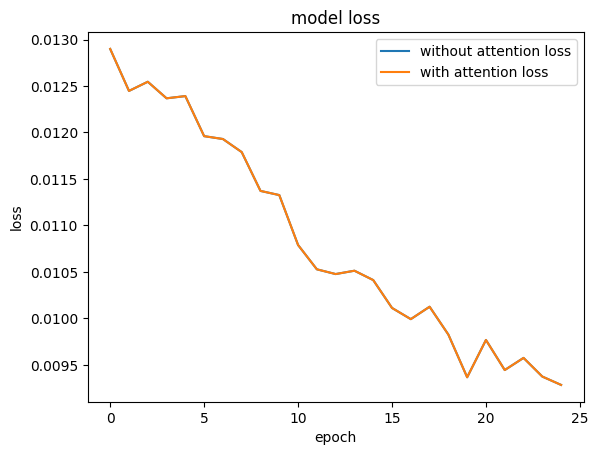

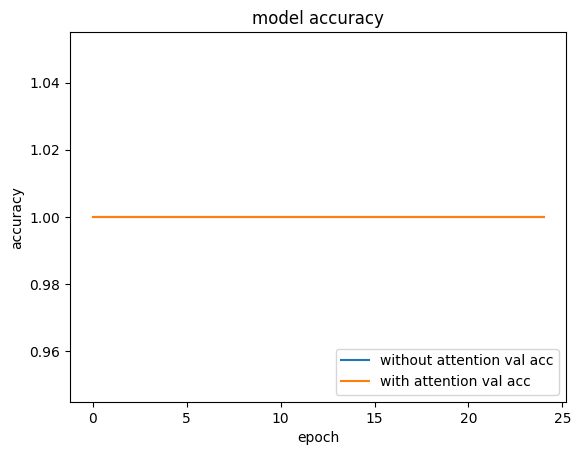

In [ ]:
history_dict_with_att = json.load(open('/content/drive/MyDrive/history.json', 'r'))
history_dict_without_att = json.load(open('/content/drive/MyDrive/history.json', 'r'))

plot_training_accuracy_together(history_dict_without_att, history_dict_with_att, savePlot=True, title = "with_att")

The best result was :

`Without attention : [epoch 21] : loss: 0.1336 - accuracy: 0.9249 - val_loss: 0.2882 - val_accuracy: 0.8887`

`With attention :    [epoch 16] : loss: 0.1213 - accuracy: 0.9323 - val_loss: 0.2697 - val_accuracy: 0.9162`


# Inference phase on encoder/decoder model with teacher forcing with attention mechanism


Build (and restore loaded) model that use attention mechanism for inference time

In [ ]:
model_name = "/content/drive/MyDrive/model_with_attention.h5"
model = load_model(model_name)
for layer in model.layers:
    print(layer.name)

OSError: No file or directory found at /content/drive/MyDrive/model_with_attention.h5

In [ ]:
# encoder
encoder_input = model.input[0]
encoder_lstm_output, encoder_state_h, encoder_state_c = model.layers[4].output
encoder_lstm_states = [encoder_state_h, encoder_state_c]
encoder_model = Model(encoder_input, # input encoder model
                      [encoder_lstm_output, encoder_state_h, encoder_state_c]) # output encoder model

# decoder
decoder_input = model.input[1]
embeded_decoder = model.layers[3]
embeded_decoder = embeded_decoder(decoder_input)
decoder_state_h = Input(shape=(256), name="input_3")
decoder_state_c = Input(shape=(256), name="input_4")
decoder_state_inputs = [decoder_state_h, decoder_state_c]
decoder_lstm = model.layers[5]
decoder_output_lstm, state_h, state_c = decoder_lstm(embeded_decoder, initial_state=decoder_state_inputs)
decoder_states = [state_h,state_c]

# Attention mechanism in decoder
encoder_out_as_input = Input(shape=(None, 256), name="input_5")
dot_layer = model.layers[6]
activation_dot_layer = model.layers[7]
attention = dot_layer([decoder_output_lstm, encoder_out_as_input])
attention = activation_dot_layer(attention)
dot_layer2 = model.layers[8]
context  = dot_layer2([attention, encoder_out_as_input])
conc_out = model.layers[9]
conc_out = conc_out([context, decoder_output_lstm])

# Decoder output
dropout_out = model.layers[10]
dropout_out = dropout_out(conc_out)
decoder_dense = model.layers[11]
decoder_outputs = decoder_dense(dropout_out)

decoder_model = Model([decoder_input, encoder_out_as_input, decoder_state_inputs], # input decoder model
                      [decoder_outputs]+decoder_states) # output decoder model

In [ ]:
tensorflow.keras.utils.plot_model(encoder_model, to_file='encoder_inference_with_attention.png', show_shapes=True)

In [ ]:
tensorflow.keras.utils.plot_model(decoder_model, to_file='decoder_inference_with_attention.png', show_shapes=True)

Pre procesing on input sentence

In [ ]:
def pre_processing_sentece(sentence):
    sentence = clean_sentence(sentence)
    # Tokenize words
    sentence_tokenized = ita_text_tokenizer.texts_to_sequences([sentence])
    sentence_tokenized = pad_sequences(sentence_tokenized, max_italian_len, padding="post")
    return sentence_tokenized

Inference phase on encoder/decoder using teacher forcing but with attention mechanism

In [ ]:
def inference_with_attention(sentence):
    encoder_output, state_h, state_c = encoder_model.predict(sentence)

    # Define target word
    target_word = np.zeros((1,1))
    # <start>:1 , <end>:2
    target_word[0,0] = 1

    stop_condition=False
    # Define output sentence string
    sent=''
    step_size=0

    index_to_words = {idx: word for word, idx in eng_text_tokenizer.word_index.items()}
    while not stop_condition:

        # We are giving a target_word which represents <start> and encoder_states to the decoder_model
        # for the first step and the output at the previous step for the next steps after the first
        # If attention mechanism is active, we give as input the encoder output also
        output, state_h, state_c = decoder_model.predict([target_word, encoder_output, [state_h, state_c]])

        # As the target word length is 1. We will only have one time step
        #encoder_state_value = [state_h, state_c]
        # Find the word which the decoder predicted with max_probability
        output = np.argmax(output,-1)
        # The output is a integer sequence, to get back the word. We use our lookup table reverse_dict
        sent = sent+' '+str(index_to_words.get(int(output)))
        step_size+=1
        # If the max_length of the sequence is reached or the model predicted 2 (<end>) stop the model
        if step_size>max_english_len or output==2:
           stop_condition = True
        # Define next decoder input
        target_word=output.reshape(1,1)

    return sent

Inference on new sentence



In [ ]:
sentences = []
sentences.append(["mia madre dice sempre che sono bello", "my mother always says im handsome", "my mother always says hes handsome"])
sentences.append(["le previsioni del tempo dicono che farà bello domani", "the weather forecast says it will be fine tomorrow", "the weather say you plan now think well"])
sentences.append(["dove posso comprare una chitarra da queste parti ?","where can i buy a guitar around here ?", "where can i buy a nearby area ?" ])

for sentence in sentences:
    sentence_tokenized = pre_processing_sentece(sentence[0])
    translated_sentence = inference_with_attention(sentence_tokenized)
    print("Input sentence             : %s" % sentence[0])
    print("Target sentence            : %s" % sentence[1])
    print("Without attention sentence : %s" % sentence[2])
    print("With attention sentence    :%s" % translated_sentence)
    print()

NameError: name 'pre_processing_sentece' is not defined